# DACN Technical Assessment

In this notebook, I will explore two datasets given by DACN as part of the stage 2 Technical Assessement. Through the datasets, I aim to ahieve three main objectives set on the task.

the objectives are to understand

    1. Company's current presence around New York
    2. Marketable population size
    3. The quality of the properties listed, as proxied by the number of reviews


## Data Cleaning and Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_1 = pd.read_csv("AB_NYC_2019.csv")
data_2 = pd.read_csv("neighborhood.csv")

print(data_1.shape)
print(data_2.shape)

(48895, 15)
(48895, 2)


In [2]:
data_1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [3]:
data_2.head()

,id,neighbourhood_group
0,36442252,Bronx
1,36435986,Bronx
2,36429652,Bronx
3,36428186,Bronx
4,36426093,Bronx


In [4]:
full_data = pd.merge(data_1, data_2, on="id", how="left")
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [5]:
full_data.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,Brooklyn
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,Manhattan
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Manhattan
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,Brooklyn
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,Manhattan
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,Manhattan
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,Brooklyn
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220,Manhattan
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0,Manhattan
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188,Manhattan


### Dealing with missing values

In [6]:
missing_values = full_data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

reviews_per_month    10052
last_review          10052
host_name               21
name                    16
dtype: int64

`host_name` and `name` columns are missing a few values and I decided to impute them with a string `Unknown`.

In [7]:
full_data[["name", "host_name"]] = full_data[["name", "host_name"]].fillna("Unknown")
missing_values = full_data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

reviews_per_month    10052
last_review          10052
dtype: int64

In [8]:
full_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
full_data["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Dealing with outliers

<AxesSubplot:>

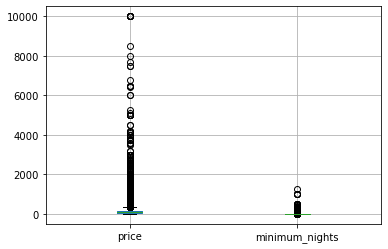

In [10]:
full_data.boxplot(column=["price","minimum_nights"])

In [11]:
full_data[full_data["price"]>8000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
6530,4737930,Spanish Harlem Apt,1235070,Olson,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,1/2/2015,0.02,1,0,Manhattan
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Astoria,40.76810,-73.91651,Private room,10000,100,2,2/13/2016,0.04,1,0,Queens
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,1/1/2016,0.14,1,83,Manhattan
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,7/27/2017,0.16,1,0,Brooklyn
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83,Manhattan
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,9/18/2018,0.18,1,251,Manhattan
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,Manhattan


As we can see, price varies greatly in the dataset, this raises a question on the dataset quality. `price`column could signifiy many things. The outliers indicates that `price` column can possibly mean price per minimum nights rather than per night as 10000USD per night is unreasonable. Therefore, we need to take precautious when dealing with price for future analysis.

In [12]:
def get_lower_upper(df, col):    
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] > upper) | (df[col] < lower)]
    return outliers

outliers_price = get_lower_upper(full_data, "price")
print(len(outliers_price))
outliers_price.head()

2972


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,11/3/2018,0.12,1,180,Manhattan
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,8/4/2016,0.24,1,7,Brooklyn
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,5/18/2019,0.55,2,243,Manhattan
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,8/9/2017,0.06,4,298,Manhattan
121,27659,3 Story Town House in Park Slope,119588,Vero,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,12/30/2018,0.24,2,216,Brooklyn


In [13]:
outliers_nights = get_lower_upper(full_data, "minimum_nights")
print(len(outliers_nights))
outliers_nights.head()

6607


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,Brooklyn
14,6090,West Village Nest - Superhost,11975,Alina,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,10/31/2018,0.22,1,0,Manhattan
29,9657,Modern 1 BR / NYC / EAST VILLAGE,21904,Dana,East Village,40.72920,-73.98542,Entire home/apt,180,14,29,4/19/2019,0.24,1,67,Manhattan
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,Brooklyn
45,12627,Entire apartment in central Brooklyn neighborh...,49670,Rana,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,11,6/5/2019,0.49,1,95,Brooklyn


In [14]:
outliers_nights[outliers_nights["minimum_nights"] > 500]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
2854,1615764,Unknown,6676776,Peter,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362,Manhattan
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,11/9/2014,0.03,1,365,Manhattan
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,1/4/2018,0.07,1,42,Manhattan
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Williamsburg,40.71772,-73.95059,Private room,79,999,24,6/28/2018,1.12,6,249,Brooklyn
38664,30378211,Shared Studio (females only),200401254,Meg,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365,Manhattan


## Exploratory Analysis

We'll first start to answer the first question - to measure the company's presence around New York City.

Text(0.5, 1.0, 'Proportions of Rental Spaces by Location')

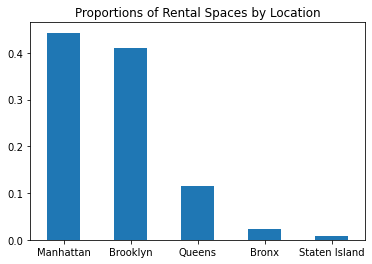

In [15]:
neighbourhood = full_data["neighbourhood_group"].value_counts(normalize=True)
neighbourhood.plot.bar(rot=0)
plt.title("Proportions of Rental Spaces by Location")

Text(0.5, 1.0, 'Proportions of Rental Spaces by Type of Rent')

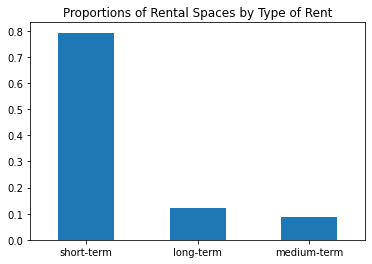

In [32]:
full_data["location_agg"] = pd.cut(full_data["minimum_nights"], [0,5,14,1250], labels=["short-term", "medium-term", "long-term"])
full_data["location_agg"].value_counts(normalize=True).plot.bar(rot=0)
plt.title("Proportions of Rental Spaces by Type of Rent")

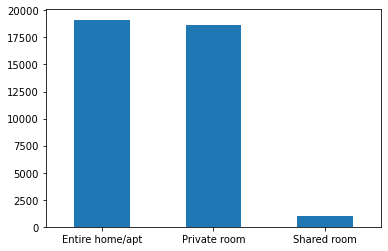

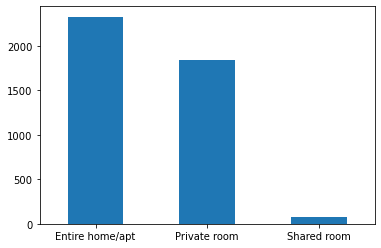

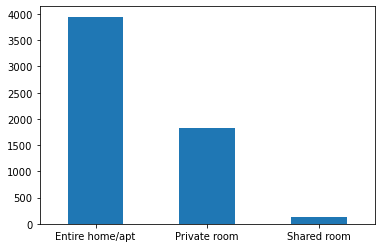

In [17]:
short_term = full_data[full_data["location_agg"] == "short-term"]
medium_term = full_data[full_data["location_agg"] == "medium-term"]
long_term = full_data[full_data["location_agg"] == "long-term"]

periods = [short_term, medium_term, long_term]

for period in periods:
    period["room_type"].value_counts().plot.bar(rot=0)
    plt.show()

Text(0.5, 1.0, 'Frequency of Type of Room')

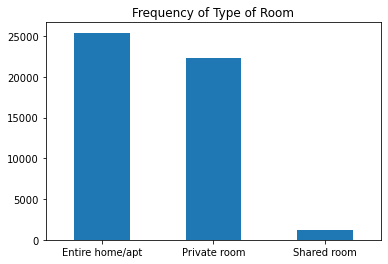

In [18]:
full_data["room_type"].value_counts().plot.bar(rot=0)
plt.title("Frequency of Type of Room")

### Objective number two

In [19]:
Q1 = full_data["price"].quantile(0.25)
Q3 = full_data["price"].quantile(0.75)
full_data["price_range"] = pd.cut(full_data["price"], [0, Q1, Q3,10000], labels=["cheap", "mid", "expensive"])

total rental spaces in this categoty is 12360


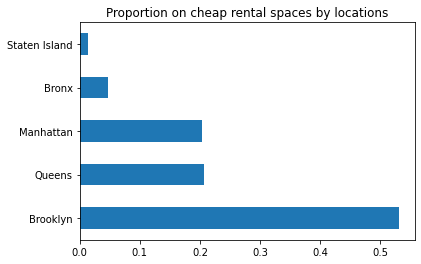

In [34]:
full_data[full_data["price_range"] == "cheap"]["neighbourhood_group"].value_counts(normalize=True).plot.barh()
plt.title("Proportion on cheap rental spaces by locations")
total_cheap = len(full_data[full_data["price_range"] == "cheap"]["neighbourhood_group"])
print(f"total rental spaces in this categoty is {total_cheap}")

total rental spaces in this categoty is 24347


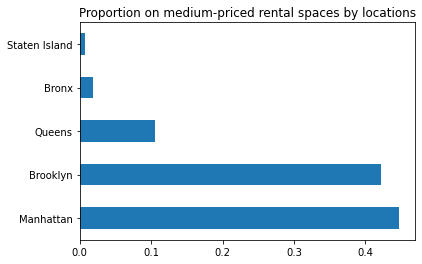

In [35]:
full_data[full_data["price_range"] == "mid"]["neighbourhood_group"].value_counts(normalize=True).plot.barh()
plt.title("Proportion on medium-priced rental spaces by locations")
total_cheap = len(full_data[full_data["price_range"] == "mid"]["neighbourhood_group"])
print(f"total rental spaces in this categoty is {total_cheap}")

total rental spaces in this categoty is 12177


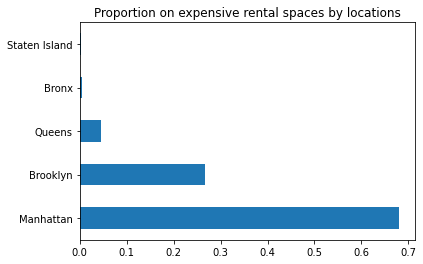

In [33]:
full_data[full_data["price_range"] == "expensive"]["neighbourhood_group"].value_counts(normalize=True).plot.barh()
plt.title("Proportion on expensive rental spaces by locations")
total_cheap = len(full_data[full_data["price_range"] == "expensive"]["neighbourhood_group"])
print(f"total rental spaces in this categoty is {total_cheap}")

In [23]:
cleaned_price = full_data.drop(index = outliers_price.index)
len(cleaned_price)

45923

remove some price outliers from the dataset

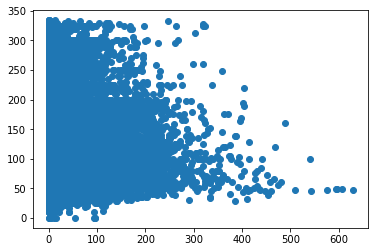

In [24]:
plt.scatter(cleaned_price["number_of_reviews"], cleaned_price["price"])

In [25]:
cleaned_price[["number_of_reviews", "price"]].corr()

,number_of_reviews,price
number_of_reviews,1.00000,-0.02769
price,-0.02769,1.00000


In [26]:
group_loc = dict()

for loc in full_data["neighbourhood_group"].unique():
    group_loc[loc] = len(full_data[full_data["neighbourhood_group"] == loc])
    
group_loc

{'Brooklyn': 20104,
 'Manhattan': 21661,
 'Queens': 5666,
 'Staten Island': 373,
 'Bronx': 1091}

In [27]:
full_data["review_prop"] = pd.cut(full_data["number_of_reviews"], [-1,0.5,1,24,629], labels=["No Review", "Good", "Great", "Excellent"])

reviews = full_data["review_prop"].unique()

locations = dict()
for loc in group_loc.keys():
    proportions = []
    for label in reviews:
        num = len(full_data[(full_data["review_prop"] == label) & (full_data["neighbourhood_group"] == loc)])
        proportions.append(num/group_loc[loc])
    locations[loc] = proportions

locations

{'Brooklyn': [0.45329287703939514,
  0.2537306008754477,
  0.1819040986868285,
  0.11107242339832869],
 'Manhattan': [0.4421310188818614,
  0.21596417524583353,
  0.23216841327731869,
  0.10973639259498638],
 'Queens': [0.4204024002823862,
  0.29632897987998585,
  0.19272855630074126,
  0.09054006353688669],
 'Staten Island': [0.3753351206434316,
  0.3646112600536193,
  0.1581769436997319,
  0.10187667560321716],
 'Bronx': [0.4188817598533456,
  0.307974335472044,
  0.19706691109074242,
  0.076076993583868]}

In [28]:
location_df = pd.DataFrame(locations, index=reviews)
location_df= location_df.reindex(["No Review","Good", "Great", "Excellent"])
location_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
No Review,0.181904,0.232168,0.192729,0.158177,0.197067
Good,0.111072,0.109736,0.090540,0.101877,0.076077
Great,0.453293,0.442131,0.420402,0.375335,0.418882
Excellent,0.253731,0.215964,0.296329,0.364611,0.307974


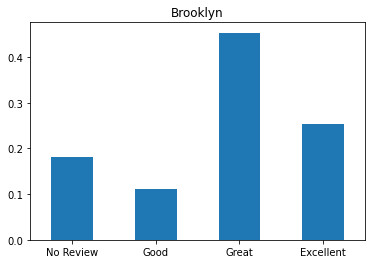

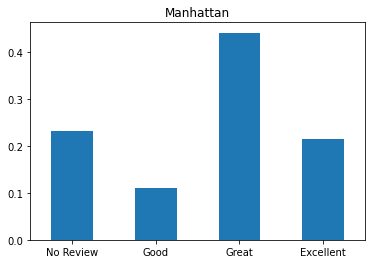

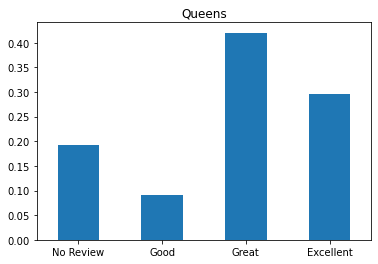

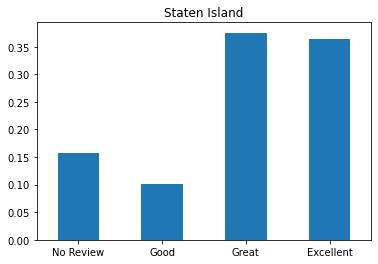

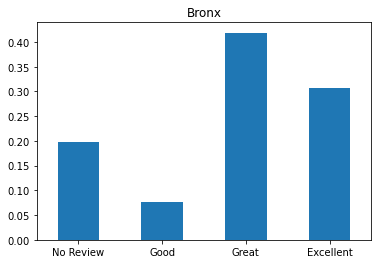

In [36]:
for locat in locations.keys():
    location_df[locat].plot.bar(rot=0)
    plt.title(locat)
    plt.show()

It seems that each neighbourhood has a fairly same amount of distribution of `Good`, `Great`, and `Excellent` quality of properties. 